This notebook explains how to
- import a raster tif file as an xarray DataArray
- get rid of nodata values at the edges of raster for proper ploting
- import a shapefile shp a a geopandas GeoDataFrame
- mask the raster using the shapefile



Introduction to Geospatial Raster and Vector Data with Python

https://carpentries-incubator.github.io/geospatial-python/



Sedgwick Reserve 2017 vegetation map source

https://databasin.org/datasets/6693af651946425c8633551df0457526/



Sedgwick Boundary shapefile source (modified in R to match CRS of vegetation raster)

https://databasin.org/datasets/41b4381f2d0342d787cbc60bbcfae53a/



### ----- OPENING TIF USING rioxarray -----

In [2]:
# ----- required libraries ----

import rioxarray  # to open raster
import geopandas as gpd # to open shapefile

In [3]:
# ---- opening file -----
sedg_veg_path = "/home/jovyan/Sedgwick_Reserve/sedgwick_vegetation/sedgveg17_CA.tif"
sedg_veg_x = rioxarray.open_rasterio(sedg_veg_path, masked=True)  
#sedg_veg = rioxarray.open_rasterio(sedg_veg_path)  
# masked = TURE to get rid of nodata
sedg_veg_x

<xarray.DataArray (band: 1, y: 1025, x: 853)>
[874325 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -6.953e+03 -6.946e+03 -6.938e+03 ... -570.9 -563.4
  * y            (y) float64 -3.634e+05 -3.634e+05 ... -3.71e+05 -3.71e+05
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    scale_factor:     1.0
    add_offset:       0.0

CRS:  EPSG:3310
nodata:  nan
bounds:  (-6957.140693307481, -371044.458133569, -559.6406933074813, -363356.958133569)
width:  853
height:  1025
type:  <class 'xarray.core.dataarray.DataArray'>


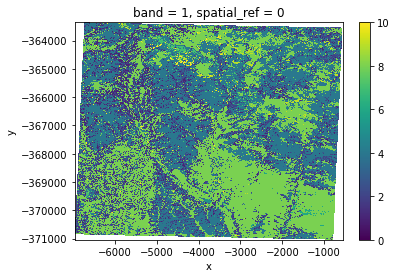

In [4]:
# ---- getting information ----

print('CRS: ',sedg_veg_x.rio.crs)
print('nodata: ',sedg_veg_x.rio.nodata)
print('bounds: ',sedg_veg_x.rio.bounds())
print('width: ',sedg_veg_x.rio.width)
print('height: ',sedg_veg_x.rio.height)
sedg_veg_x.plot()
# sedg_veg_x.plot.imshow(robust=True)

In [6]:
# ------- more info -----
print('type: ', type(sedg_veg_x))
sedg_veg_x

type:  <class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray (band: 1, y: 1025, x: 853)>
[874325 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -6.953e+03 -6.946e+03 -6.938e+03 ... -570.9 -563.4
  * y            (y) float64 -3.634e+05 -3.634e+05 ... -3.71e+05 -3.71e+05
    spatial_ref  int64 0
Attributes:
    SourceBandIndex:  0
    scale_factor:     1.0
    add_offset:       0.0

In [ ]:
# ------ look at CRS ------
#from pyproj import CRS
#epsg = sedg_veg_x.rio.crs.to_epsg()
#crs = CRS(epsg)

### ------ OPENING SHP WITH geopandas -----

In [6]:
# ---- opening file ----

sedg_shp_path = "/home/jovyan/Sedgwick_Reserve/sedgwick_geometry/sedgwick_geometry.shp"
sedg_shp_gpd = gpd.read_file(sedg_shp_path)

In [7]:
# ---- getting information ----

# From R:
# Bounding box:  xmin: -120.0717 ymin: 34.67874 xmax: -120.0118 ymax: 34.74399
# these are in Geodetic CRS:  WGS 84

print(sedg_shp_gpd.type)
print('   ')
print(sedg_shp_gpd.bounds)
sedg_shp_gpd.crs

0    Polygon
dtype: object
   
          minx           miny         maxx          maxy
0 -6562.160984 -370851.846513 -1075.576535 -363609.35433


<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

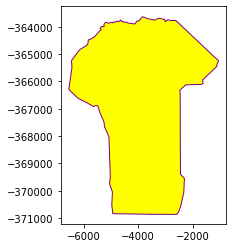

In [8]:
sedg_shp_gpd.plot(edgecolor='purple', color='yellow')

### ------ MASKING RASTER -----

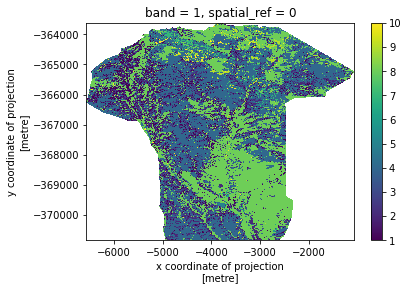

In [10]:
# see clip documentation at:
#    https://corteva.github.io/rioxarray/stable/examples/clip_geom.html

clipped = sedg_veg_x.rio.clip(sedg_shp_gpd.geometry, 
                              sedg_shp_gpd.crs)

# Note: If you have rasterio < 1.2 you will need convert the geometries to dict-like objects if the projection
# of the geometries differ from the raster. For example:
#
# from shapely.geometry import mapping
#  geometries = geodf.geometry.apply(mapping)

clipped.plot()

## ***** OTHER STUFF I TRIED BUT DID NOT WORK ******

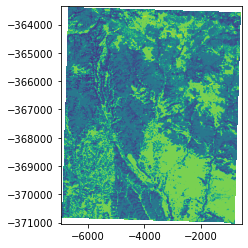

<AxesSubplot:>

In [11]:
# ---- Opening tif with rasterio -----
import rasterio
from rasterio.plot import show


sedg_veg_path = "/home/jovyan/Sedgwick_Reserve/sedgwick_vegetation/sedgveg17_CA.tif"
sedg_veg = rasterio.open(sedg_veg_path)
# type = rasterio.io.DatasetReader

show(sedg_veg)

In [16]:
# ------ Opening shp with fiona -----
import fiona

sedg_shp_path = "/home/jovyan/Sedgwick_Reserve/sedgwick_geometry/sedgwick_geometry.shp"
sedg_shp = fiona.open(sedg_shp_path, "r")
# type = fiona.collection.Collection

# ? could not plot the shp

fiona.collection.Collection

In [18]:
# ? Masking
# Documentation:
# https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html?highlight=mask#

#out_image, out_transform = rasterio.mask.mask(sedg_veg, sedg_mask, crop=True)